In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.optimizers import *
from keras.models import load_model
import matplotlib.pyplot as plt
from music21 import chord, instrument, converter, note, stream
import glob
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization as BatchNorm
import time
import random

print("DONE")

DONE


In [2]:
# colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


notes = []
start_time = time.time()
for file in glob.glob("drive/MyDrive/Praca_inzynierska/dane_treningowe/midi_clear/*.mid"):
    midi = converter.parse(file)
    parts = instrument.partitionByInstrument(midi)
    notes_to_parse = None

    if parts:
        for part in parts:
            if part.getInstrument() is not None:
                instrument_name = part.getInstrument().instrumentName
                if instrument_name == "Acoustic Guitar":
                    notes_to_parse = part.recurse()
                    chord_notes = []
                    for element in notes_to_parse:
                        if isinstance(element, note.Note):
                            notes.append(str(element.pitch))
                        elif isinstance(element, chord.Chord):
                            notes.append('.'.join(str(n) for n in element.normalOrder))
                            #chord_notes = [str(n) for n in element.normalOrder]
                            #chord_str = '.'.join(chord_notes)
                            #notes.append(chord_str)

with open("midi_test_mala.txt", "w") as file:
    for note_item in notes:
        file.write(note_item + " ")
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time_minutes = elapsed_time / 60
print(f"Czas wykonywania programu: {elapsed_time_minutes} minut")
print("DONE")


In [3]:
notes = []
data1 = []
with open('drive/MyDrive/Praca_inzynierska/mala_baza.txt', 'r') as file:
    data = file.read().split()

for item in data:
    data1.append(item)

lm = int(0.05 * len(data1))

for item in range(lm):
    notes.append(data1[item])



print("DONE")

DONE


In [ ]:
print(notes[:100])

['D2', '2.5.9', 'D2', '2.5.9', 'D2', '2.5.9', '2.5.9', 'D2', '2.5.9', '2.5.9', 'B-1', '10.2.5', 'B-1', '10.2.5', 'B-1', '10.2.5', '10.2.5', 'B-1', '10.2.5', '10.2.5', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'B-1', '10.2.5', 'B-1', '10.2.5', 'B-1', '10.2.5', '10.2.5', '10.2.5', 'B-1', '10.2.5', '10.2.5', '10.2.5', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0']


In [4]:
pitchnames = sorted(set(item for item in notes)) # zbiór unikalnych akordów i nut
n_vocab = len(pitchnames) #ilosc unikalnych nut i akordów
#słownik, przypisanie nutom ich odpowiednich liczb
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
print("DONE")
print(n_vocab)
print(note_to_int)

DONE
334
{'0': 0, '0.1': 1, '0.1.2': 2, '0.1.2.3': 3, '0.1.3.4': 4, '0.1.3.4.6': 5, '0.1.3.4.8': 6, '0.1.3.6': 7, '0.1.4': 8, '0.1.5': 9, '0.2': 10, '0.2.3': 11, '0.2.3.5': 12, '0.2.4.7': 13, '0.2.5.7': 14, '0.2.6': 15, '0.2.7': 16, '0.3': 17, '0.3.5': 18, '0.3.6': 19, '0.3.6.9': 20, '0.3.7': 21, '0.4': 22, '0.4.7': 23, '0.5': 24, '0.6': 25, '1': 26, '1.2': 27, '1.2.5': 28, '1.3': 29, '1.3.4': 30, '1.3.4.8': 31, '1.3.6': 32, '1.3.6.8': 33, '1.3.7': 34, '1.3.8': 35, '1.4': 36, '1.4.6': 37, '1.4.6.9': 38, '1.4.7': 39, '1.4.7.9': 40, '1.4.8': 41, '1.5': 42, '1.5.9': 43, '1.6': 44, '1.7': 45, '10': 46, '10.0': 47, '10.0.2': 48, '10.0.2.5': 49, '10.0.3': 50, '10.0.4': 51, '10.0.5': 52, '10.1': 53, '10.1.3': 54, '10.1.3.6': 55, '10.1.4': 56, '10.1.4.6': 57, '10.1.5': 58, '10.11': 59, '10.11.0': 60, '10.11.1.2': 61, '10.11.1.3.6': 62, '10.11.3': 63, '10.11.3.6': 64, '10.2': 65, '10.2.3': 66, '10.2.5': 67, '10.3': 68, '11': 69, '11.0': 70, '11.0.1': 71, '11.0.1.2.3': 72, '11.0.1.2.3.7': 73, '1

In [5]:
#wejscia i wyjścia sieci
network_input = []
network_output = []
network = []
seq = 65 # dlugosc sekwencji wejsciowej 10,25,50,100
sequence_length = seq + 1

for i in range(0, len(notes) - sequence_length):
    sequence = notes[i:i + sequence_length]
    network.append(sequence)

random.shuffle(network)

for j in range(len(network)):
    sequence_in = network[j][:(sequence_length - 1)]
    sequence_out = network[j][sequence_length - 1]
    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])

n_patterns = len(network_input)
print(network_input[10:100])
print(network_output[0])

print("DONE")

[[313, 263, 263, 292, 263, 263, 276, 275, 275, 312, 263, 263, 313, 263, 312, 311, 311, 173, 312, 173, 173, 327, 173, 173, 312, 275, 313, 275, 312, 263, 263, 276, 263, 292, 263, 275, 312, 263, 312, 263, 263, 276, 263, 263, 312, 275, 275, 312, 263, 263, 313, 263, 312, 275, 276, 312, 312, 263, 292, 292, 292, 263, 263, 276, 263], [312, 317, 312, 175, 175, 317, 312, 312, 317, 312, 92, 92, 292, 287, 287, 292, 287, 92, 92, 292, 287, 287, 292, 287, 92, 92, 292, 287, 287, 292, 287, 92, 92, 292, 287, 287, 292, 287, 297, 297, 287, 175, 175, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225], [195, 321, 322, 256, 195, 195, 281, 301, 177, 67, 67, 321, 195, 195, 281, 67, 67, 321, 24, 276, 195, 296, 51, 331, 165, 296, 312, 331, 296, 164, 321, 195, 281, 67, 321, 24, 276, 195, 321, 322, 276, 297, 281, 282, 301, 322, 67, 321, 322, 276, 297, 322, 276, 297, 281, 301, 322, 282, 301, 322, 282, 321, 297, 322, 276], [110, 332, 283, 332, 17, 307, 332, 

In [6]:
# normalizacja danych wejściowych
network_input = np.reshape(network_input, (n_patterns, seq, 1))
network_input = network_input / float(n_vocab) # od 0 do 1
network_output = to_categorical(network_output) # one-hot encoding
print(network_input[0])
print("Kształt danych wejściowych (network_input):", network_input.shape)
print("Kształt danych wyjściowych (network_output):", network_output.shape)
# print(network_output)
network_input_train = network_input[: int(0.85*len(network_input))]
network_output_train = network_output[:int(0.85*len(network_output))]

network_input_val = network_input[int(0.85*len(network_output)):]
network_output_val = network_output[int(0.85*len(network_output)):]

print("Kształt danych wejściowych treningowych :", network_input_train.shape)
print("Kształt danych wyjściowych treningowych :", network_output_train.shape)
print("Kształt danych wejściowych walidacyjnych :", network_input_val.shape)
print("Kształt danych wyjściowych walidacyjnych :", network_output_val.shape)


[[0.82634731]
 [0.99101796]
 [0.85928144]
 [0.88922156]
 [0.93712575]
 [0.82934132]
 [0.93712575]
 [0.88922156]
 [0.88922156]
 [0.85928144]
 [0.        ]
 [0.93712575]
 [0.82634731]
 [0.99401198]
 [0.88323353]
 [0.99401198]
 [0.93712575]
 [0.65868263]
 [0.89820359]
 [0.82634731]
 [0.82634731]
 [0.90419162]
 [0.95209581]
 [0.82934132]
 [0.33532934]
 [0.82634731]
 [0.82634731]
 [0.82634731]
 [0.67365269]
 [0.85928144]
 [0.85928144]
 [0.89820359]
 [0.95209581]
 [0.90419162]
 [0.76646707]
 [0.88922156]
 [0.98802395]
 [0.99101796]
 [0.90419162]
 [0.85928144]
 [0.90419162]
 [0.90419162]
 [0.99401198]
 [0.90419162]
 [0.85928144]
 [0.89820359]
 [0.82934132]
 [0.95209581]
 [0.81736527]
 [0.65568862]
 [0.85928144]
 [0.90419162]
 [0.88323353]
 [0.99101796]
 [0.90419162]
 [0.88922156]
 [0.93712575]
 [0.99401198]
 [0.93712575]
 [0.88922156]
 [0.82634731]
 [0.89820359]
 [0.82634731]
 [0.88922156]
 [0.82634731]]
Kształt danych wejściowych (network_input): (28871, 65, 1)
Kształt danych wyjściowych (ne

In [7]:
# tworzenie modelu
activation = 'relu'
optimizer = 'rmsprop' # 'rmsprop'Adam
loss='categorical_crossentropy'
num_of_neurons = 512 # 20, 50, 100, 200
num_of_layers = 2
#model = Sequential()
#model.add(LSTM(num_of_neurons, activation=activation, input_shape=(network_input_train.shape[1], network_input_train.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(num_of_neurons, activation=activation, return_sequences=False))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#model = Sequential()
#model.add(LSTM(
#        256,
#        input_shape=(network_input.shape[1], network_input.shape[2]),
#        return_sequences=True
#    ))
#model.add(Dropout(0.3))
#model.add(LSTM(512, return_sequences=True))
#model.add(Dropout(0.3))
#model.add(LSTM(512))
#model.add(Dense(256))
#model.add(Dropout(0.3))
#model.add(Dense(n_vocab))
#model.add(Activation('softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = Sequential()
model.add(LSTM(
    256,
    input_shape=(network_input.shape[1], network_input.shape[2]),
    recurrent_dropout=0.3,
    return_sequences=True # return sequence instead fo matrix
))

model.add(LSTM(512, return_sequences=True, recurrent_dropout=0.3))
model.add(LSTM(512))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(n_vocab))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print("DONE")

DONE


In [13]:
# checkpoint - zapisanie najlepszego modelu
epochs = 15
batch_size = 64
#file_name = f'MODEL_GRU_{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.hdf5'
file_name = "drive/MyDrive/Praca_inzynierska/mod/weights-improvement28+13+41+14+{epoch:02d}-{loss:.4f}-AI_80_seq_wej_.hdf5"
checkpoint = ModelCheckpoint(file_name, save_best_only=True, monitor='loss', verbose=0)
print("DONE")

DONE


In [14]:
# trening
history = model.fit(network_input_train, network_output_train, epochs=epochs, batch_size=batch_size, validation_data=(network_input_val, network_output_val), callbacks=[checkpoint])
print("DONE")

Epoch 1/15
384/384 [==============================] - 224s 553ms/step - loss: 0.6381 - val_loss: 0.2797
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


384/384 [==============================] - 211s 547ms/step - loss: 0.5749 - val_loss: 0.3185
Epoch 3/15
384/384 [==============================] - 224s 583ms/step - loss: 0.5517 - val_loss: 0.3507
Epoch 4/15
384/384 [==============================] - 210s 546ms/step - loss: 0.5300 - val_loss: 0.3578
Epoch 5/15
384/384 [==============================] - 210s 547ms/step - loss: 0.5067 - val_loss: 0.4032
Epoch 6/15
384/384 [==============================] - 203s 528ms/step - loss: 0.4842 - val_loss: 0.4328
Epoch 7/15
384/384 [==============================] - 201s 521ms/step - loss: 0.4730 - val_loss: 0.4365
Epoch 8/15
384/384 [==============================] - 197s 514ms/step - loss: 0.4461 - val_loss: 0.4475
Epoch 9/15
384/384 [==============================] - 201s 523ms/step - loss: 0.4536 - val_loss: 0.4785
Epoch 10/15
384/384 [==============================] - 203s 529ms/step - loss: 0.4294 - val_loss: 0.4956
Epoch 11/15
384/384 [==============================] - 206s 535ms/step - l

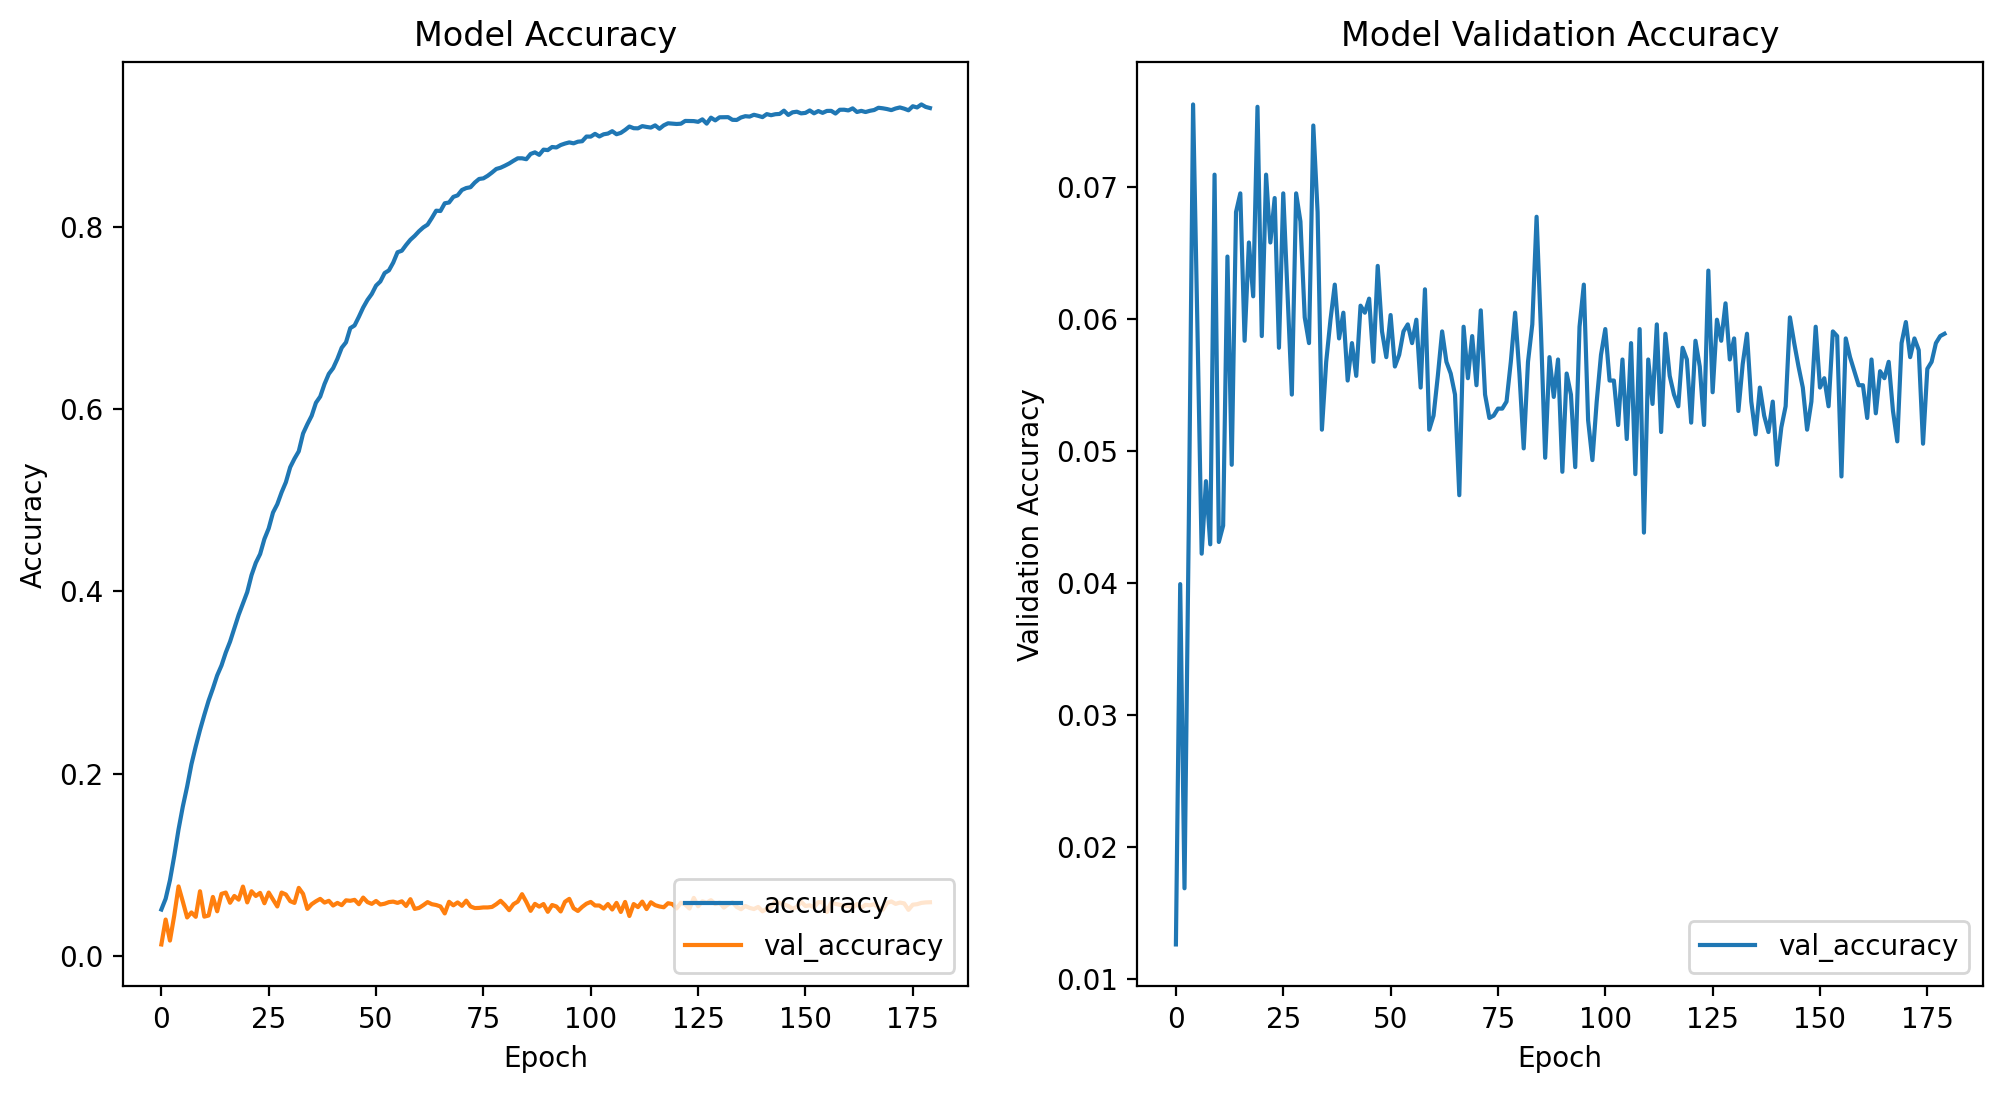

In [ ]:
#loaded_model = load_model('MODEL_2lstm_25neurons_25epochs_100batchsize_seq100.hdf5')

#try:
#    history = loaded_model.history
#except AttributeError:
#    print("Model nie posiada historii trenowania.")
#    history = None

if history is not None:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Wykres val_accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend(loc='lower right')

    plt.show()
else:
    print("Brak dostępnej historii trenowania.")


In [12]:
model = load_model("drive/MyDrive/Praca_inzynierska/mod/weights-improvement28+13+4114-0.4984-AI_80_seq_wej_.hdf5")
print("DONEE")

DONEE


In [128]:
# generowanie nowych nut
number_of_notes = 58
start = np.random.randint(0, len(network_input_train) - sequence_length - 1)
#start = 2
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
pattern = network_input_train[start]
tr = network_input_train[start]
train = []
prediction_output = []
for note_index in range(number_of_notes):
    prediction_input = np.reshape(pattern, (1, len(pattern), 1)) # normalizacja
  #  prediction_input = prediction_input / float(n_vocab)
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    # print(pattern)
    result = int_to_note[index]
    prediction_output.append(result)
    index = index / float(n_vocab)
    pattern = np.append(pattern, index)
    pattern = pattern[1:len(pattern)]
    k = (tr[note_index])
    j = n_vocab * k
    w = int_to_note[int(j)]
    train.append(w)
    #cos = int_to_note[tr[note_index]]
    #train = np.append(train, cos)

#print(train)
#print(len(train))
print("______________________")
print(train)
print(len(train))
print("______________________")
#print(pattern)
#print(len(pattern))
print("DONE")
print("______________________")
print(prediction_output)
print(len(prediction_output))
print("______________________")


______________________
['0.4', '0.4', '0.4', '0.4', 'E4', 'E4', 'A3', 'A3', 'C4', 'C4', 'D4', 'D4', 'E4', 'E4', '9.0.4', '9.0.4', '9.0.4', '9.0.4', 'E4', 'E4', 'D4', 'D4', 'E4', 'E4', 'A3', 'A3', 'C4', 'C4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'E4', 'E4', '8.11.2', '8.11.2', '8.11.2', '8.11.2', 'A3', 'A3', 'C4', 'C4', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', '9.0.4', '9.0.4', '9.0.4', '9.0.4', 'C4', 'C4']
58
______________________
DONE
______________________
['A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.11.2', '9.11.2', '9.11.2', '9.11.2', '11.4', '11.4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'E4', 'E4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '0.4.7', '0.4.7', '0.2.7', '0.2.7', '5.9.0', '5.9.0', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', '0.4.7', '0.4.7', '0.4.7', '0.4.7', '2.7']
58
______________________


In [ ]:
print(prediction_output)

In [129]:
# tworzenie nut i akordów dla nowych danych
offset = 0  # przesuniecie nut lub akordów (czas)
output_notes = []

for item in prediction_output:
    # szukanie akordów
    if ('.' in item) or item.isdigit():
        notes_in_chord = item.split('.')
      #  print(notes_in_chord)
        notes12 = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.AcousticGuitar()
            notes12.append(new_note)
        new_chord = chord.Chord(notes12)
        new_chord.offset = offset
        output_notes.append(new_chord)
    # nuta
    else:
          #   print(item)
        new_note = note.Note(item)
        new_note.offset = offset
        new_note.storedInstrument = instrument.AcousticGuitar()
        output_notes.append(new_note)

    offset += 0.5
       # new_note = note.Note(item)
       # new_note.offset = offset
       # new_note.storedInstrument = instrument.AcousticGuitar()
       # output_notes.append(new_note)



print("DONE")
print(output_notes)

DONE
[<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note G>, <music21.chord.Chord A B D>, <music21.chord.Chord A B D>, <music21.chord.Chord A B D>, <music21.chord.Chord A B D>, <music21.chord.Chord B E>, <music21.chord.Chord B E>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note A>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note G>, <music21.chord.Chord A C D F>, <music21.chord.Chord A C D F>, <music21.chord.Chord C D F G>, <music21.chord.Chord C D F G>, <music21.chord.Chord A C D F>, <music21.chord.Chord A C D F>, <music21.chord.Ch

DONE


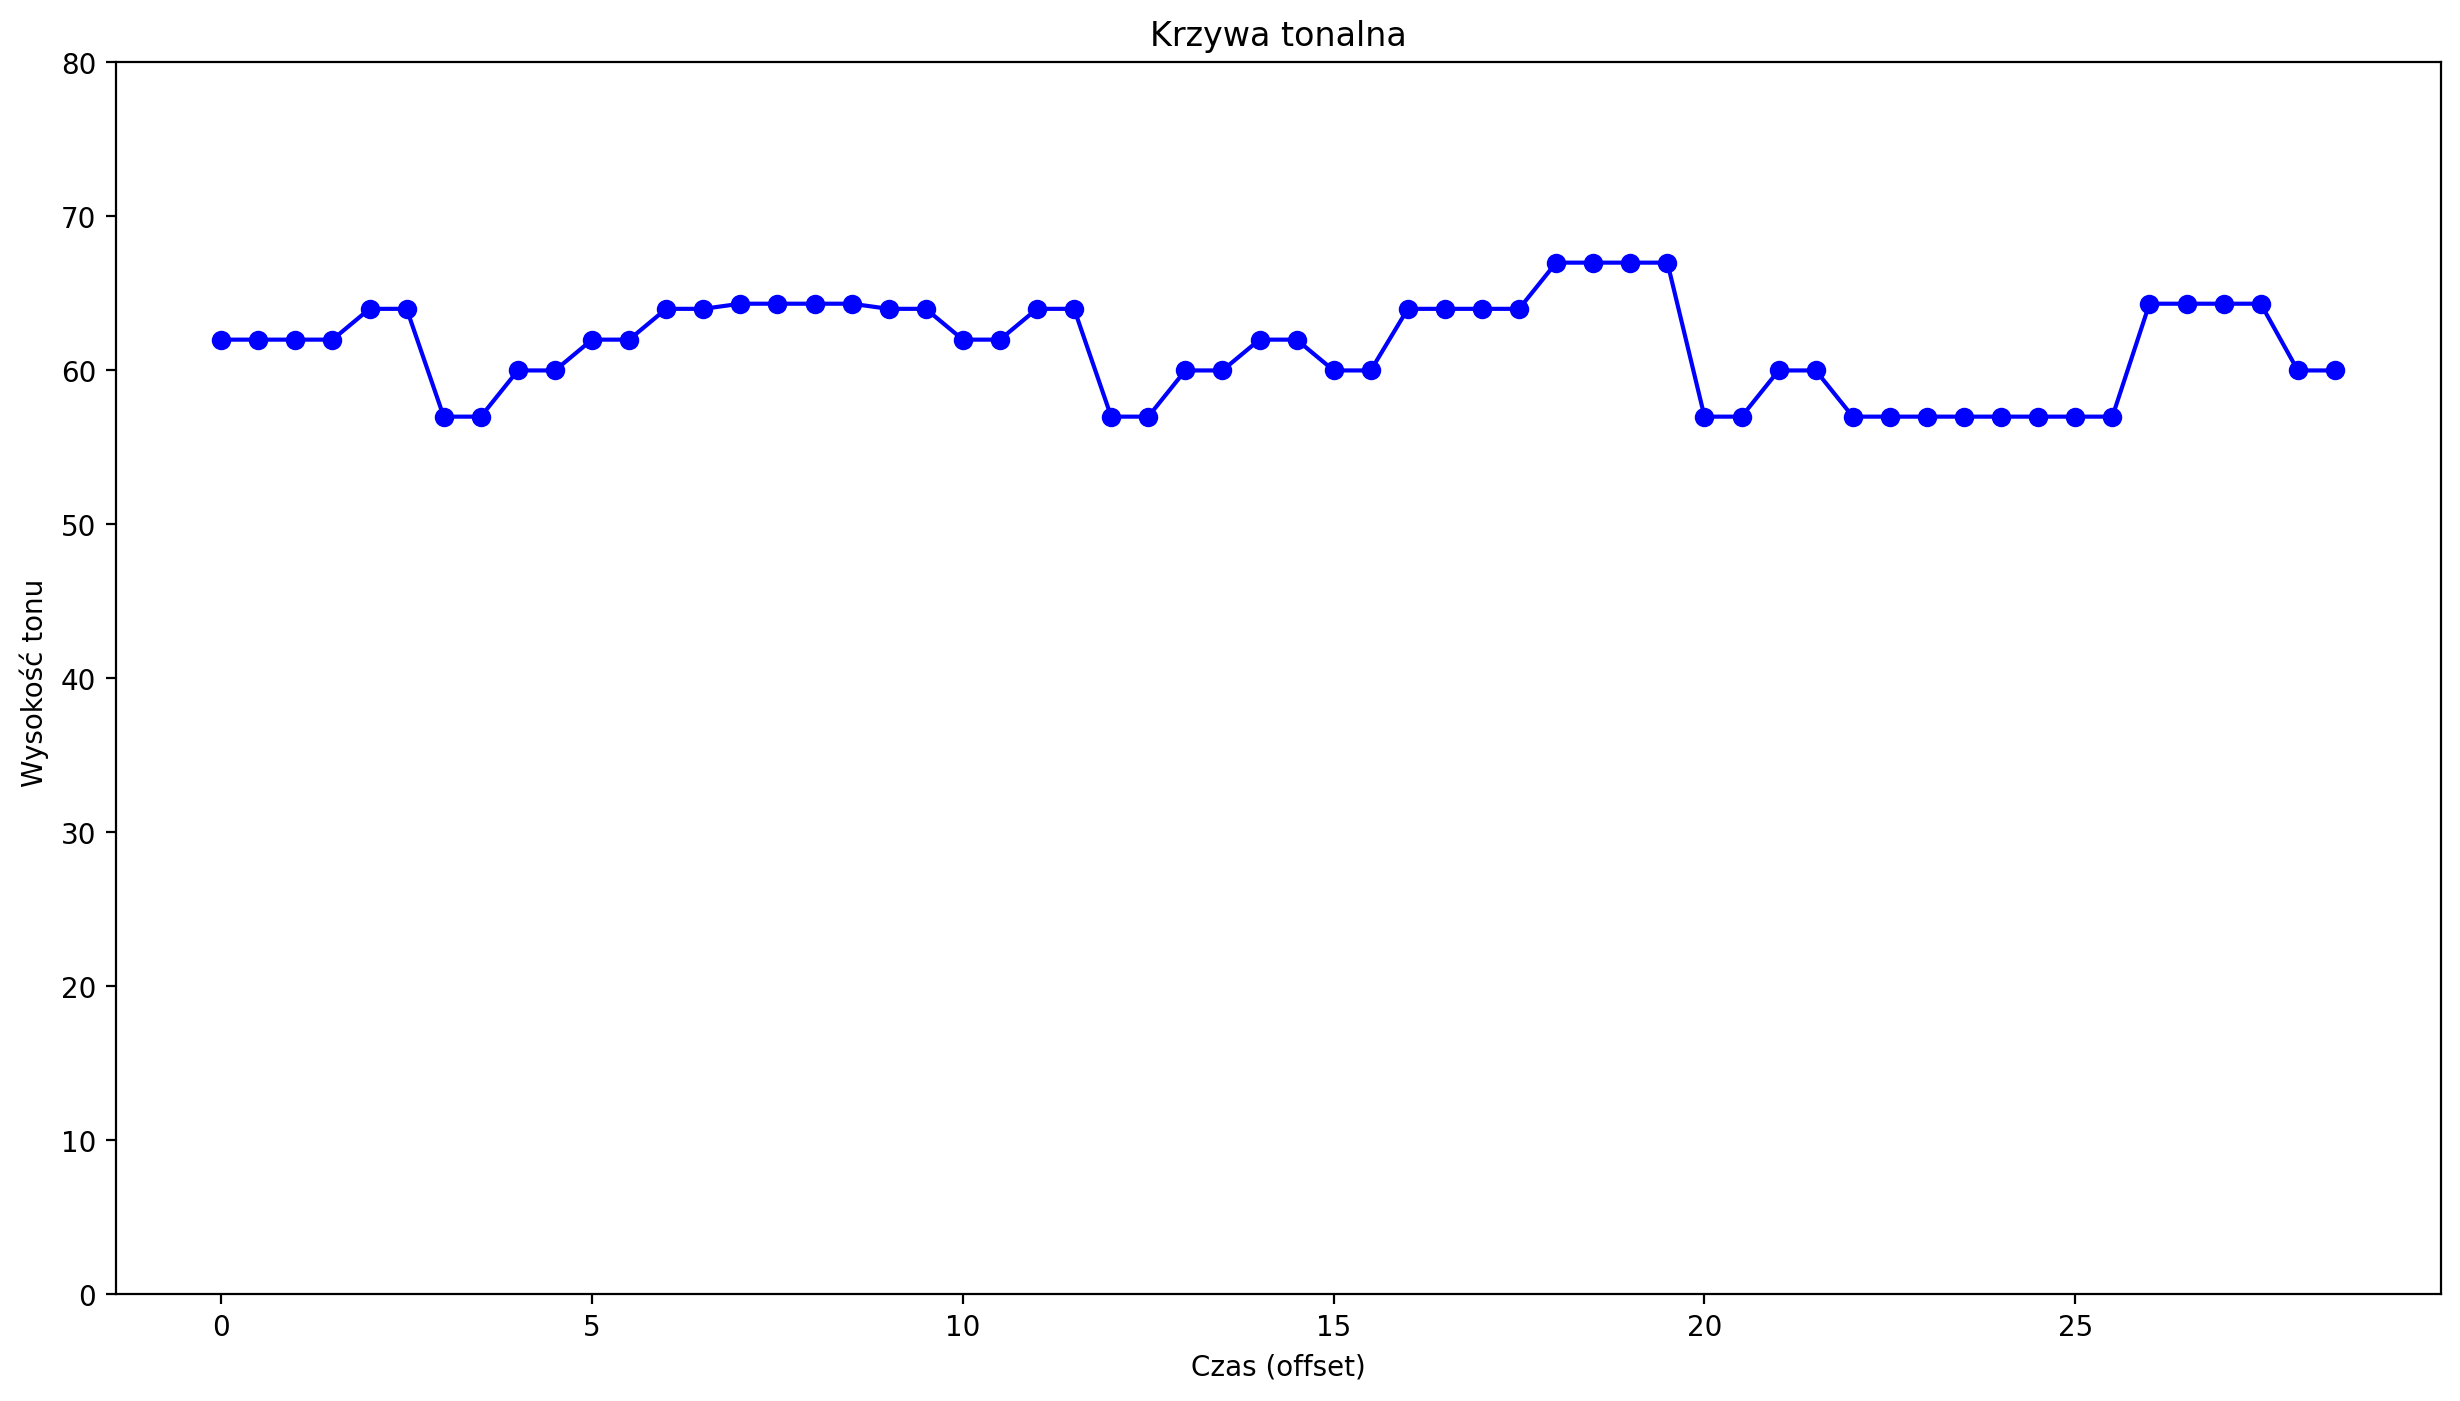

In [130]:
# DLA DANYCH TRENINGOWYCH

offset = 0  # przesuniecie nut lub akordów (czas)
output_notes1 = []

for item in train:
    # szukanie akordów
    if ('.' in item) or item.isdigit():
        notes_in_chord = item.split('.')
      #  print(notes_in_chord)
        notes12 = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.AcousticGuitar()
            notes12.append(new_note)
        new_chord = chord.Chord(notes12)
        new_chord.offset = offset
        output_notes1.append(new_chord)
    # nuta
    else:
          #   print(item)
        new_note = note.Note(item)
        new_note.offset = offset
        new_note.storedInstrument = instrument.AcousticGuitar()
        output_notes1.append(new_note)

    offset += 0.5


offsets1 = []
pitches1 = []

for item in output_notes1:
    if isinstance(item, note.Note):
        offsets1.append(item.offset)
        pitches1.append(item.pitch.midi)
    elif isinstance(item, chord.Chord):
        chord_pitches = [note_in_chord.pitch.midi for note_in_chord in item.notes]
        avg_pitch = sum(chord_pitches) / len(chord_pitches) # dla akordów liczona jest średnia arytmetyczna
        offsets1.append(item.offset)
        pitches1.append(avg_pitch)

plt.figure(figsize=(15, 8))
plt.plot(offsets1, pitches1, marker='o', linestyle='-', color='b')
plt.title('Krzywa tonalna')
plt.xlabel('Czas (offset)')
plt.ylabel('Wysokość tonu ')

# Ustaw zakres osi Y
plt.ylim(0, 80)

plt.savefig('drive/MyDrive/Praca_inzynierska/wykres_tonalny_trening6.png')

file_out = f'drive/MyDrive/Praca_inzynierska/Dane_treingowe_6.mid'

midi_stream = stream.Stream()

guitar = instrument.Guitar()
midi_stream.append(guitar)

for item in output_notes1:
    if isinstance(item, note.Note) or isinstance(item, chord.Chord):
        # Ustaw instrument dla każdej nuty i akordu
        item.storedInstrument = guitar
      #  item.offset = offset
        midi_stream.append(item)
        #offset += 0.5

#file_out = f'trening_MODEL{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.mid'
midi_stream.write('midi', fp=file_out)
print("DONE")


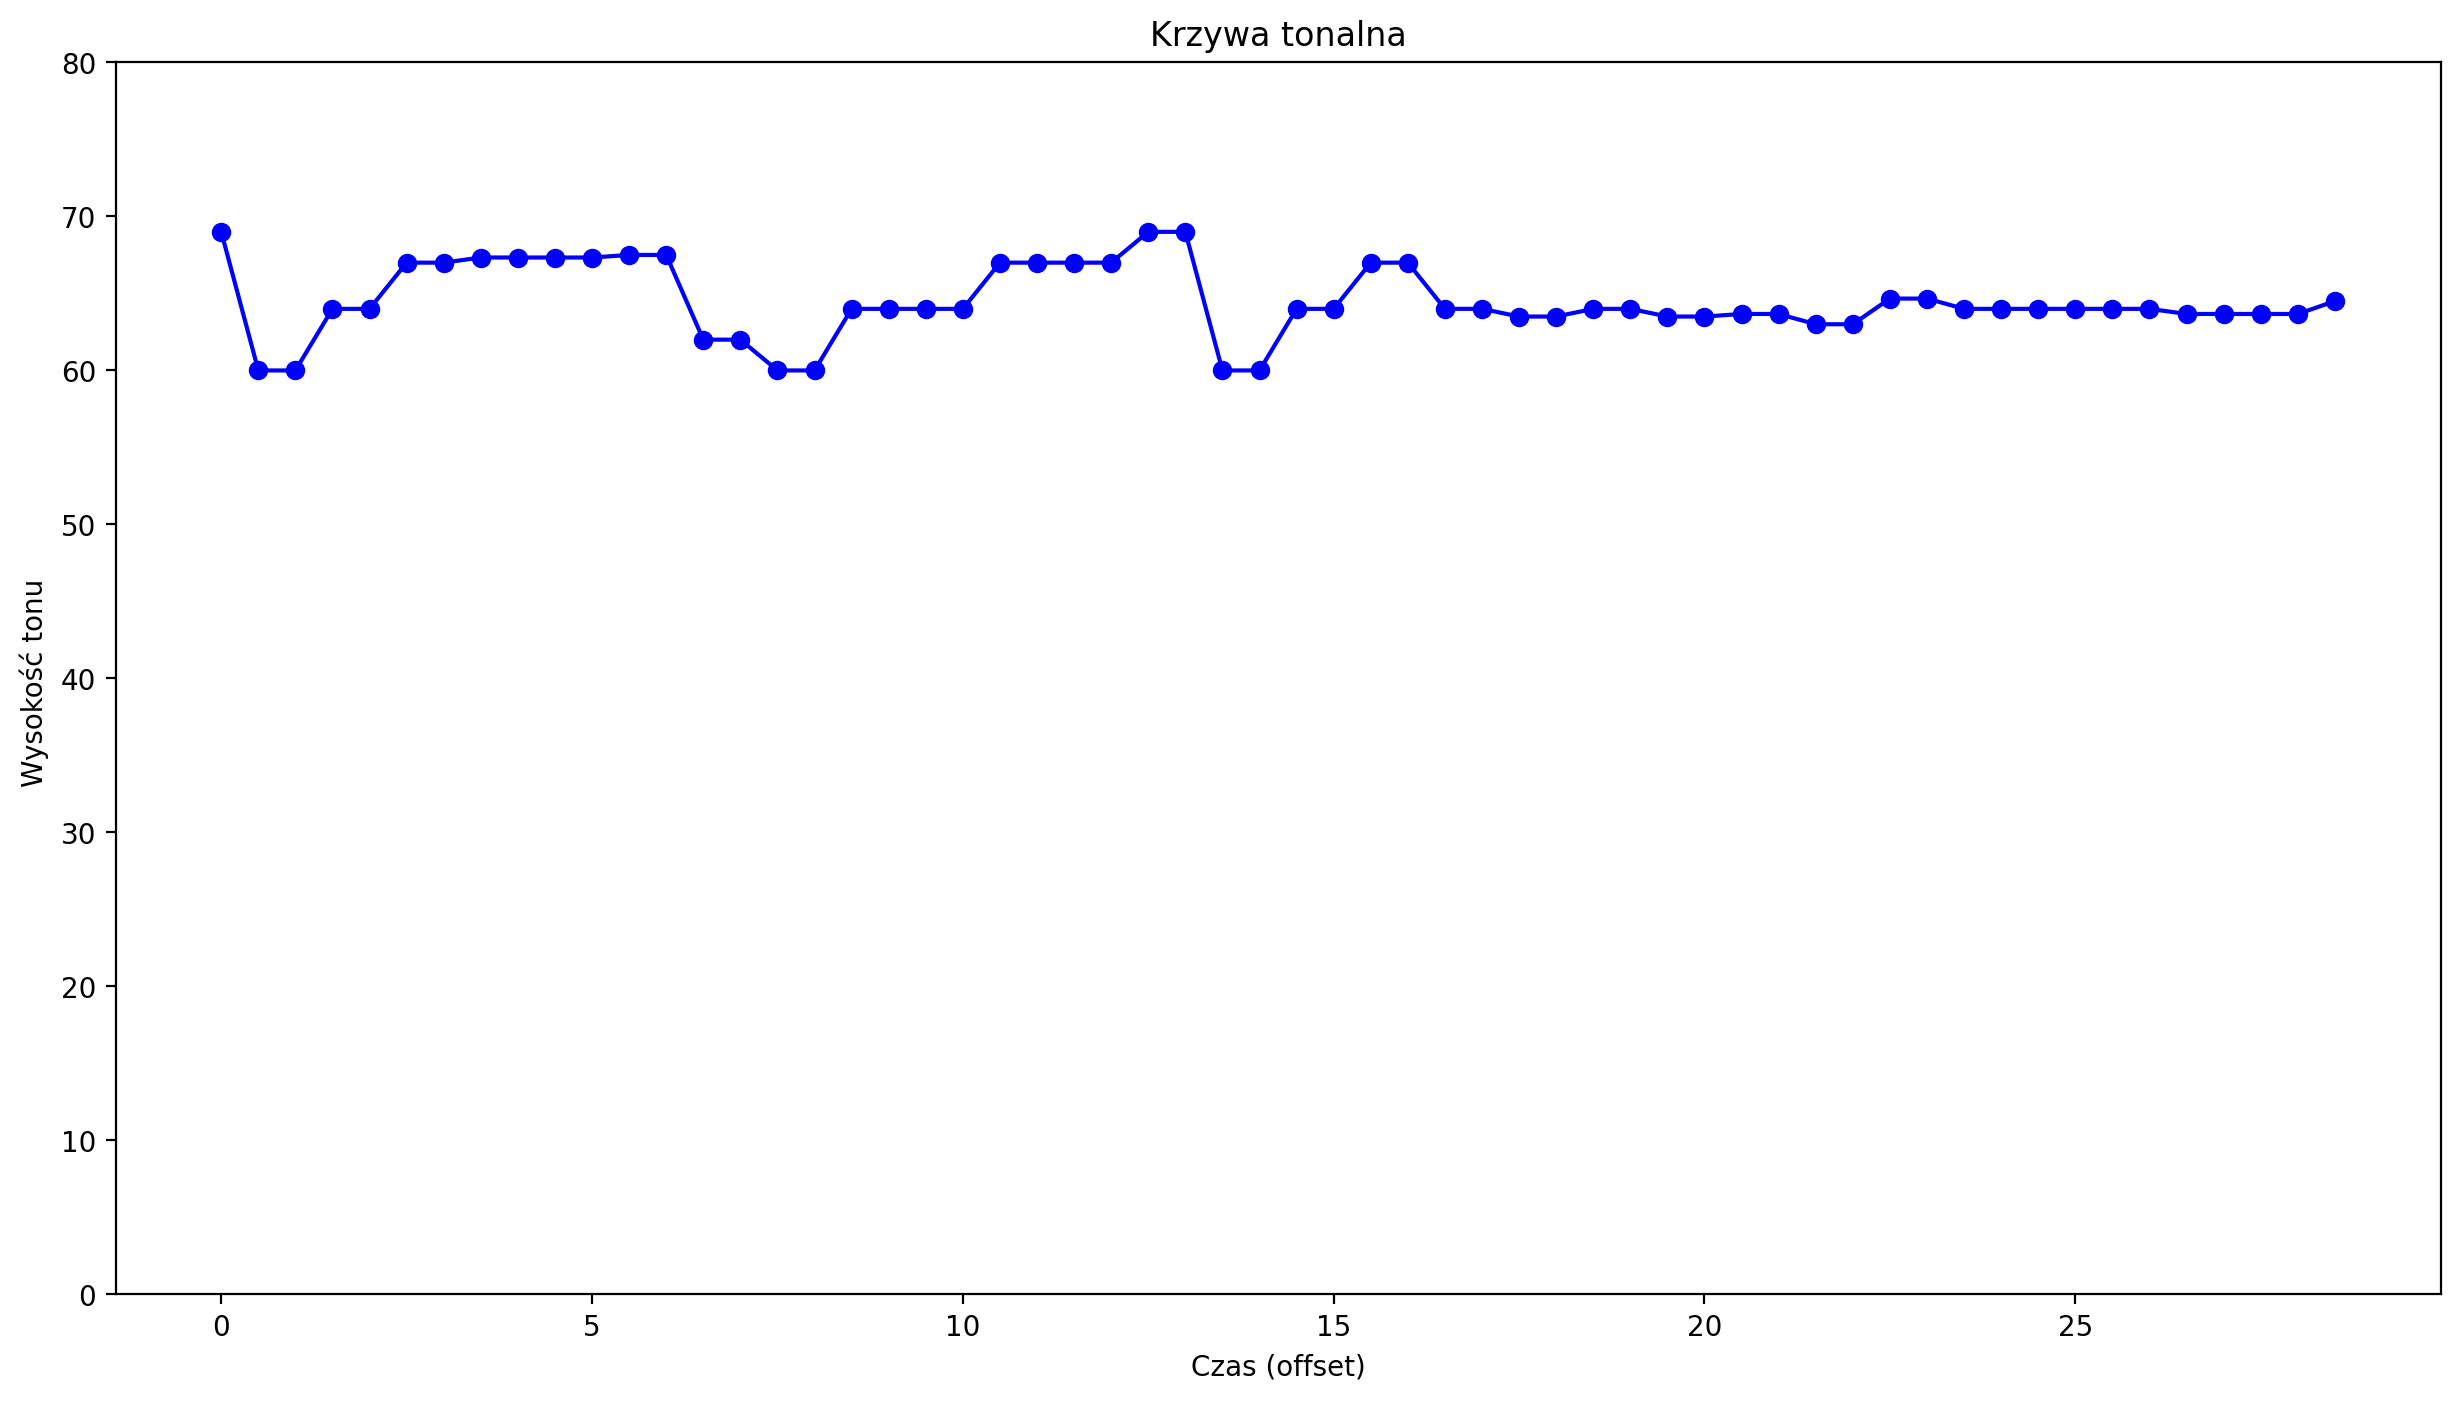

In [131]:
# nowe dane
offsets = []
pitches = []

for item in output_notes:
    if isinstance(item, note.Note):
        offsets.append(item.offset)
        pitches.append(item.pitch.midi)
    elif isinstance(item, chord.Chord):
        chord_pitches = [note_in_chord.pitch.midi for note_in_chord in item.notes]
        avg_pitch = sum(chord_pitches) / len(chord_pitches) # dla akordów liczona jest średnia arytmetyczna
        offsets.append(item.offset)
        pitches.append(avg_pitch)

plt.figure(figsize=(15, 8))
plt.plot(offsets, pitches, marker='o', linestyle='-', color='b')
plt.title('Krzywa tonalna')
plt.xlabel('Czas (offset)')
plt.ylabel('Wysokość tonu ')

# Ustaw zakres osi Y
plt.ylim(0, 80)
plt.savefig('drive/MyDrive/Praca_inzynierska/wykres_tonalny_nowe_dane6.png')

In [132]:
# tworzenie pliku midi
#offset = 0
file_out = f'drive/MyDrive/Praca_inzynierska/NOWE_DANE_6.mid'

midi_stream = stream.Stream()

guitar = instrument.Guitar()
midi_stream.append(guitar)

for item in output_notes:
    if isinstance(item, note.Note) or isinstance(item, chord.Chord):
        # Ustaw instrument dla każdej nuty i akordu
        item.storedInstrument = guitar
      #  item.offset = offset
        midi_stream.append(item)
        #offset += 0.5

#file_out = f'MODEL{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.mid'
midi_stream.write('midi', fp=file_out)
print("DONE")



DONE


In [60]:
mf = converter.parse(file_out)
mf.show('midi')

In [138]:
print(prediction_output)

['A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.11.2', '9.11.2', '9.11.2', '9.11.2', '11.4', '11.4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'E4', 'E4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '0.4.7', '0.4.7', '0.2.7', '0.2.7', '5.9.0', '5.9.0', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', '0.4.7', '0.4.7', '0.4.7', '0.4.7', '2.7']


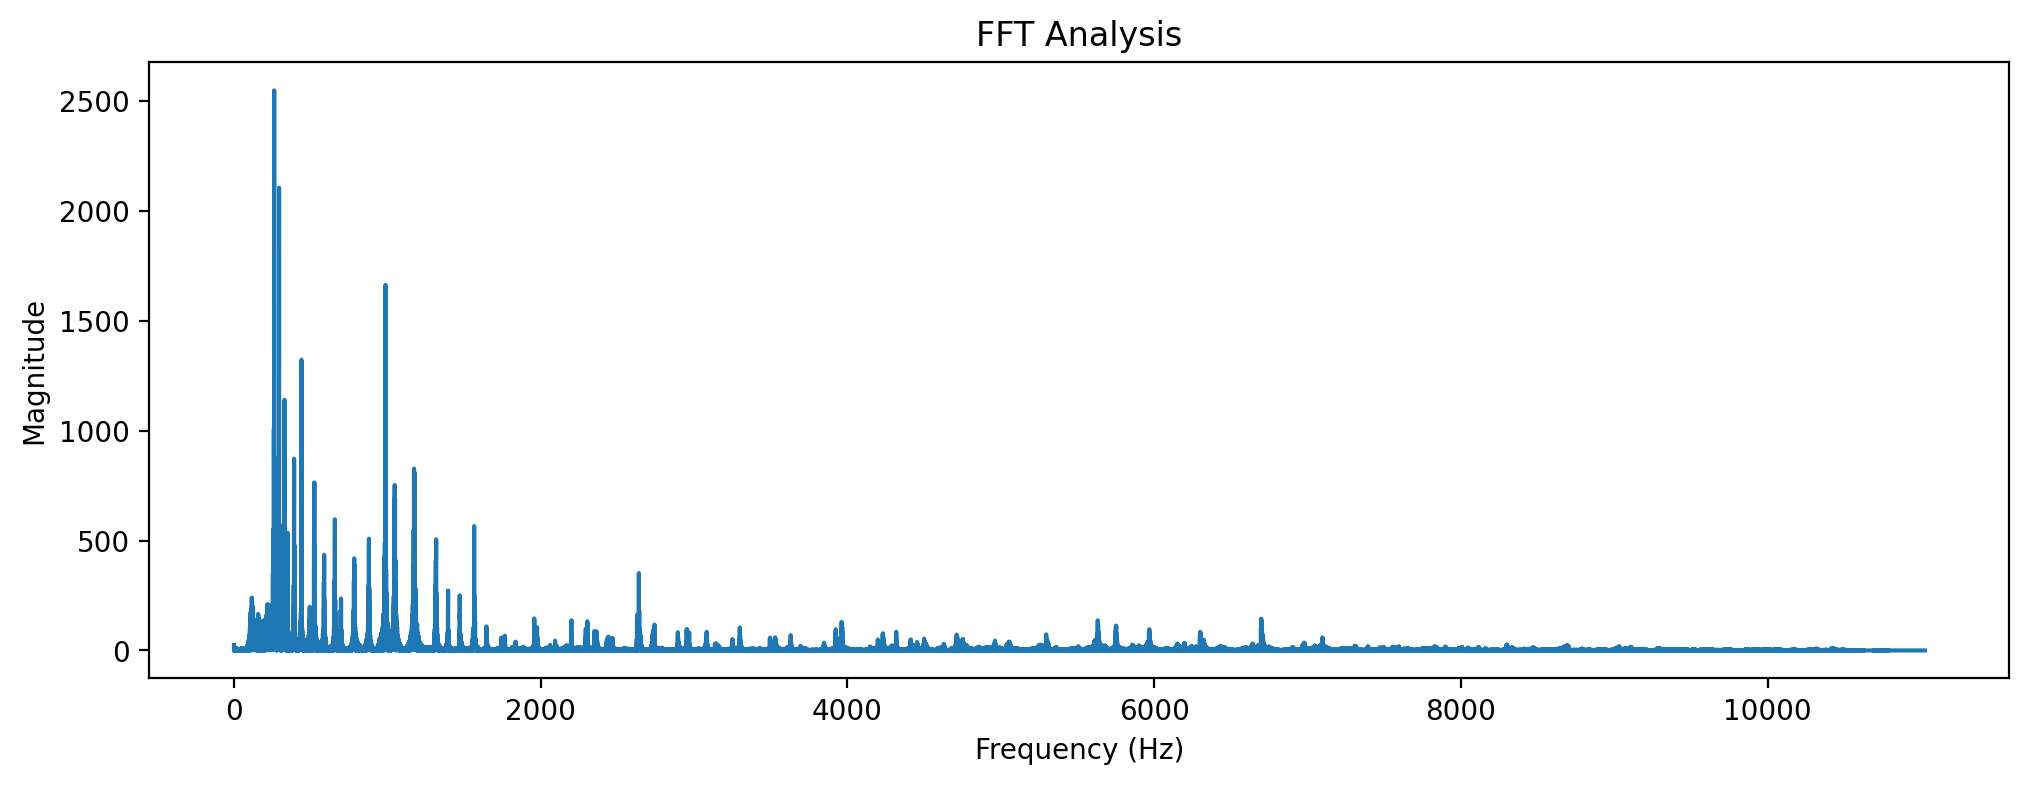

In [145]:
import librosa
import librosa.display

file_path = 'drive/MyDrive/Praca_inzynierska/muzyka_nowe_dane/NOWE_DANE_6.wav'
output_image_path = 'drive/MyDrive/Praca_inzynierska/fft_dane_nowe/wykres_nowe_6.png'
y, sr = librosa.load(file_path)


fft_result = np.fft.fft(y)
magnitude = np.abs(fft_result)
frequency = np.fft.fftfreq(len(magnitude), 1/sr)


plt.figure(figsize=(12, 4))
plt.plot(frequency[:len(frequency)//2], magnitude[:len(magnitude)//2])
plt.title('FFT Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


plt.savefig(output_image_path)
plt.show()

